<a href="https://colab.research.google.com/github/NithyaPKiran/Assignments/blob/main/Assignment_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

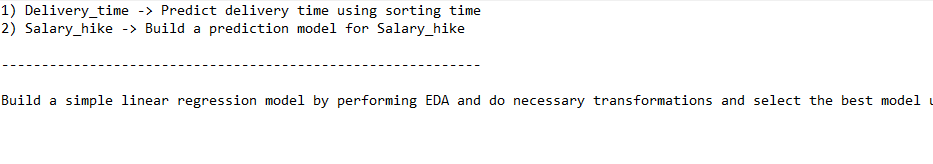

#Question 1 - Delivery Time

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
#Data visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

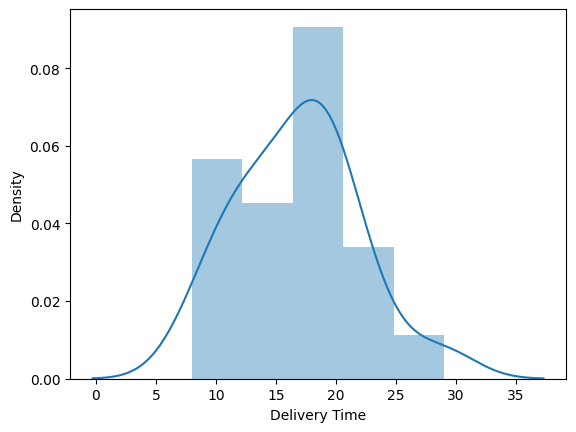

In [12]:
sns.distplot(dataset['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

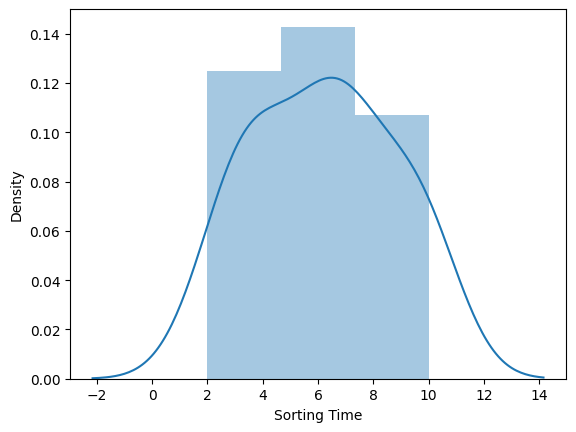

In [13]:
sns.distplot(dataset['Sorting Time'])

In [25]:
#Feature Engineering
#Renaming the columns
dataset= dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [26]:
#Correlation analysis
dataset.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

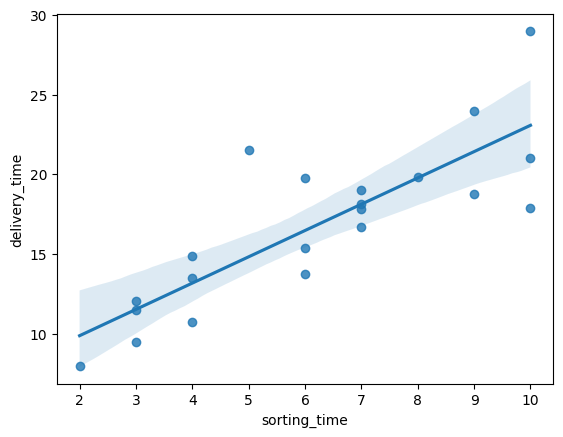

In [27]:
sns.regplot(x=dataset['sorting_time'], y=dataset['delivery_time'])

In [29]:
#Model Building
model = smf.ols("delivery_time~sorting_time", data=dataset).fit()
model

In [30]:
#Model Testing
#finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [31]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [32]:
#Finding rsq and rsq adj values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [34]:
#Model Prediction
#Manual Prediction for sorting time 5 - using data from the parameters
delivery_time =  6.582734 + (1.649020)*(5)
delivery_time

14.827834

In [35]:
  #automatic prediction for sorting time 5,8
  new_data = pd.Series([5,8])
  new_data

0    5
1    8
dtype: int64

In [39]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [40]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

#Question 2 - Salary Hike

In [42]:
dataset2 = pd.read_csv('Salary_Data.csv')
dataset2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
#Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

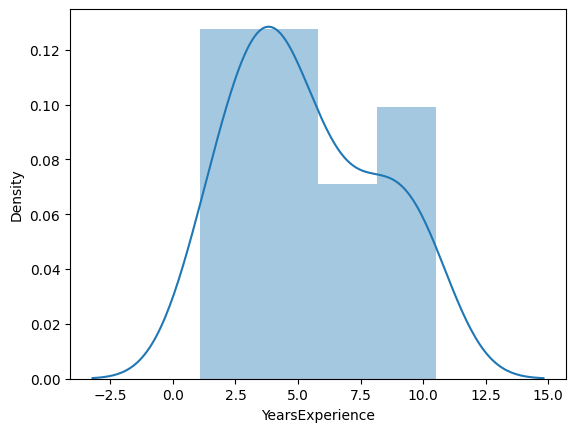

In [44]:
sns.distplot(dataset2['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

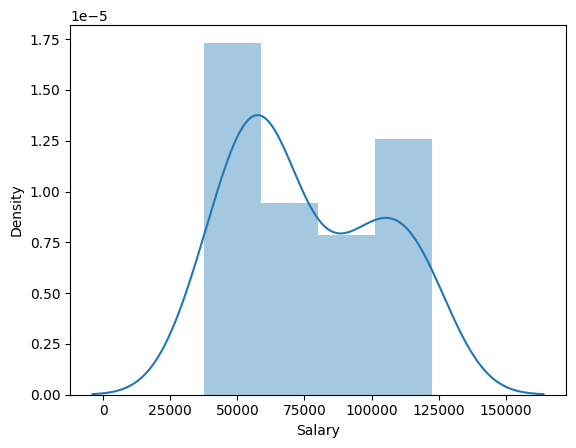

In [45]:
sns.distplot(dataset2['Salary'])

In [46]:
#Correlation analysis
dataset2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

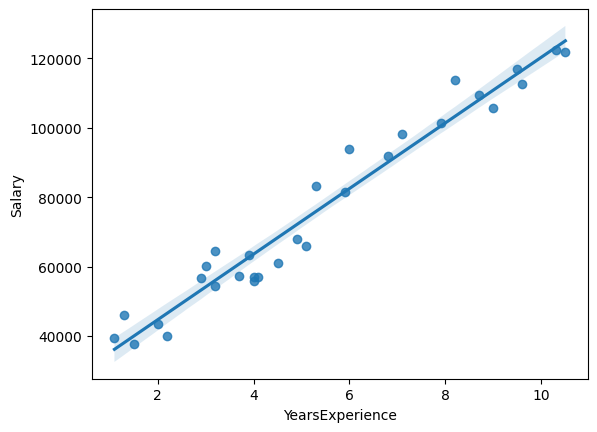

In [47]:
sns.regplot(x=dataset2['YearsExperience'], y=dataset2['Salary'])

In [48]:
#Model Building
model2 = smf.ols('Salary~YearsExperience',data=dataset2).fit()

In [52]:
#Model Testing
#FInding coefficient Parameters
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [53]:
#t and p values
model2.tvalues , model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [54]:
#rsq and adj rsq
model2.rsquared, model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [56]:
#Model Prediction
#Manual for 3 years experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [57]:
#Automatic
salary_auto = pd.Series([3,5])
salary_auto

0    3
1    5
dtype: int64

In [58]:
data_pred2 = pd.DataFrame(salary_auto,columns=['YearsExperience'])
data_pred2

,YearsExperience
0,3
1,5
